# Deep Learning Project- Home Loan Data Analysis
## Submitted by- Vivek Chitale

#### Problem Statement: 

For a safe and secure lending experience, it's important to analyze the past data. In this project, you have to build a deep learning model to predict the chance of default for future loans using the historical data. As you will see, this dataset is highly imbalanced and includes a lot of features that make this problem more challenging.

Objective: Create a model that predicts whether or not an applicant will be able to repay a loan using the historical data

Domain: Finance

Analysis to be done: Perform data preprocessing and build a deep learning prediction model

Steps to be done:

1)      Load the dataset that is given to you

2)      Check for null values in the dataset

3)      Print the percentage of default to a payer of the dataset for the TARGET column

4)      Balance the dataset if the data is imbalanced

5)      Plot the balanced or imbalanced data

6)      Encode the columns that is required for the model

7)      Calculate Sensitivity as a metric
8)      Calculate the area under the receiver operating characteristics curve

In [553]:
#Importing libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

### 1. Load the dataset that is given to you

In [467]:
#Loading the data from csv file
df = pd.read_csv("House Loan Data Analysis_Dataset\\loan_data.csv")

In [468]:
#Show data frame
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [469]:
# Get the column names
df.columns.to_list()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

 ### 2. Check for null values in the dataset

In [471]:
#check the missing values (null data)
df.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [472]:
# There are null values, Print the null value count and name of the column
nullvalues = df.isna().sum().tolist()
colnames = df.columns.tolist()
for each in zip(colnames, nullvalues):
    if each[1] >1:
        print(each)

('AMT_ANNUITY', 12)
('AMT_GOODS_PRICE', 278)
('NAME_TYPE_SUITE', 1292)
('OWN_CAR_AGE', 202929)
('OCCUPATION_TYPE', 96391)
('CNT_FAM_MEMBERS', 2)
('EXT_SOURCE_1', 173378)
('EXT_SOURCE_2', 660)
('EXT_SOURCE_3', 60965)
('APARTMENTS_AVG', 156061)
('BASEMENTAREA_AVG', 179943)
('YEARS_BEGINEXPLUATATION_AVG', 150007)
('YEARS_BUILD_AVG', 204488)
('COMMONAREA_AVG', 214865)
('ELEVATORS_AVG', 163891)
('ENTRANCES_AVG', 154828)
('FLOORSMAX_AVG', 153020)
('FLOORSMIN_AVG', 208642)
('LANDAREA_AVG', 182590)
('LIVINGAPARTMENTS_AVG', 210199)
('LIVINGAREA_AVG', 154350)
('NONLIVINGAPARTMENTS_AVG', 213514)
('NONLIVINGAREA_AVG', 169682)
('APARTMENTS_MODE', 156061)
('BASEMENTAREA_MODE', 179943)
('YEARS_BEGINEXPLUATATION_MODE', 150007)
('YEARS_BUILD_MODE', 204488)
('COMMONAREA_MODE', 214865)
('ELEVATORS_MODE', 163891)
('ENTRANCES_MODE', 154828)
('FLOORSMAX_MODE', 153020)
('FLOORSMIN_MODE', 208642)
('LANDAREA_MODE', 182590)
('LIVINGAPARTMENTS_MODE', 210199)
('LIVINGAREA_MODE', 154350)
('NONLIVINGAPARTMENTS_MODE

### 3. Print the percentage of default to a payer of the dataset for the TARGET column

In [474]:
# As per 'Data_Dictionary' file, 
# Description --> "TARGET" Column --> Whether the loan was repaid (1 for yes, 0 for no).
# Loan_repaid = 1
# Loan_defaulter = 0

loan_repaid = (df.TARGET==1).sum()
loan_defaulter = (df.TARGET==0).sum()
print('Number of loan defaulters= ', defaulters)
print('Number of loan repaid payers= ', payers)

# Calculate percentage of default (TARGET = 0) and non-default (TARGET = 1)
defaulter_percentage = df['TARGET'].value_counts(normalize=True) * 100

# Print the percentages
print(f"Percentage of 'Loan Repaid' (TARGET = 1): {defaulter_percentage[1]:.2f}%")
print(f"Percentage of 'Loan Defaulters' (TARGET = 0): {defaulter_percentage[0]:.2f}%")

Number of loan defaulters=  282686
Number of loan repaid payers=  24825
Percentage of 'Loan Repaid' (TARGET = 1): 8.07%
Percentage of 'Loan Defaulters' (TARGET = 0): 91.93%


 ### 4. Balance the dataset if the data is imbalanced

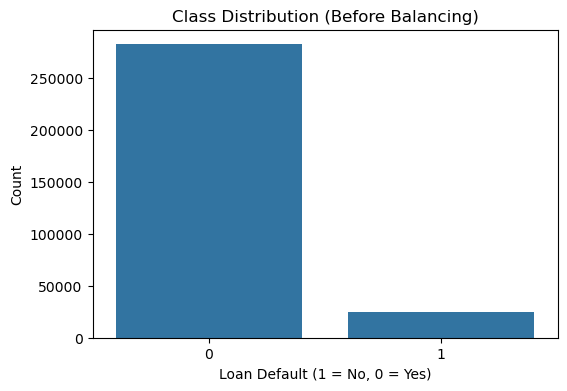

In [476]:
# Plot class distribution before balancing (in number)
plt.figure(figsize=(6,4))
sns.countplot(x=df['TARGET'])
plt.title('Class Distribution (Before Balancing)')
plt.xlabel('Loan Default (1 = No, 0 = Yes)')
plt.ylabel('Count')
plt.show()

<Axes: ylabel='count'>

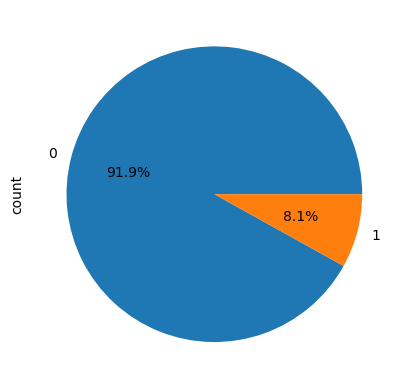

In [477]:
# Plot class distribution before balancing (in %)
df.TARGET.value_counts().plot(kind='pie',autopct='%1.1f%%')

In [478]:
# random under sampling 
shuffled_data = df.sample(frac=1,random_state=3)
loan_repaid = shuffled_data.loc[shuffled_data['TARGET']==1]
loan_defaulters = shuffled_data.loc[shuffled_data['TARGET']==0].sample(n=24825,random_state=69)

normalised_home_loan = pd.concat([loan_repaid, loan_defaulters])
print((normalised_home_loan['TARGET']==0).value_counts())
print('Payers- class 1:', loan_repaid.shape)
print('Defaulters- class 0:', loan_defaulters.shape)

TARGET
False    24825
True     24825
Name: count, dtype: int64
Payers- class 1: (24825, 122)
Defaulters- class 0: (24825, 122)


### 5. Plot the balanced or imbalanced data

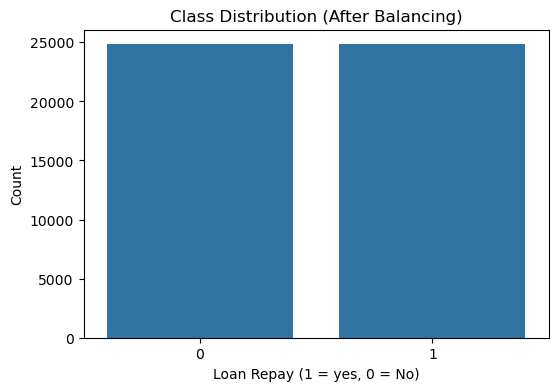

In [485]:
# Plot class distribution before balancing (in number)
plt.figure(figsize=(6,4))
sns.countplot(x=normalised_home_loan['TARGET'])
plt.title('Class Distribution (After Balancing)')
plt.xlabel('Loan Repay (1 = yes, 0 = No)')
plt.ylabel('Count')
plt.show()

<Axes: ylabel='count'>

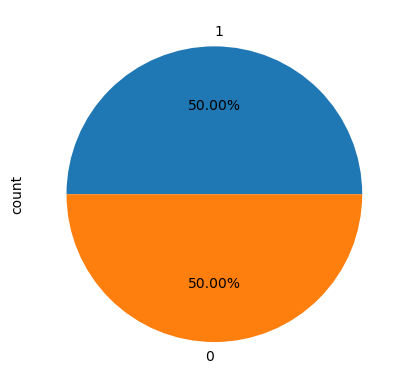

In [487]:
# Plot class distribution after balancing (in %)
normalised_home_loan.TARGET.value_counts().plot(kind='pie',autopct="%1.2f%%")

In [489]:
# get normalized data info
normalised_home_loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49650 entries, 207339 to 121862
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 46.6+ MB


In [491]:
#check null value and count
normalised_home_loan.isnull().sum()

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     7648
AMT_REQ_CREDIT_BUREAU_WEEK    7648
AMT_REQ_CREDIT_BUREAU_MON     7648
AMT_REQ_CREDIT_BUREAU_QRT     7648
AMT_REQ_CREDIT_BUREAU_YEAR    7648
Length: 122, dtype: int64

In [493]:
#print unique null value total where present 
print('AMT_REQ_CREDIT_BUREAU_DAY', pd.unique(normalised_home_loan.AMT_REQ_CREDIT_BUREAU_DAY)) 
print('AMT_REQ_CREDIT_BUREAU_WEEK', pd.unique(normalised_home_loan.AMT_REQ_CREDIT_BUREAU_WEEK))
print('AMT_REQ_CREDIT_BUREAU_MON', pd.unique(normalised_home_loan.AMT_REQ_CREDIT_BUREAU_MON))
print('AMT_REQ_CREDIT_BUREAU_QRT', pd.unique(normalised_home_loan.AMT_REQ_CREDIT_BUREAU_QRT))
print('AMT_REQ_CREDIT_BUREAU_YEAR', pd.unique(normalised_home_loan.AMT_REQ_CREDIT_BUREAU_YEAR))

AMT_REQ_CREDIT_BUREAU_DAY [ 0. nan  1.  2.  4.  3.  9.]
AMT_REQ_CREDIT_BUREAU_WEEK [ 0. nan  1.  2.  4.  3.  5.  6.]
AMT_REQ_CREDIT_BUREAU_MON [ 0. nan  1.  3.  5.  9.  2.  6.  8.  4. 11. 12.  7. 13. 10. 17. 15. 14.
 16. 18. 27.]
AMT_REQ_CREDIT_BUREAU_QRT [ 0. nan  2.  3.  1.  4.  5.  6. 19.  7.]
AMT_REQ_CREDIT_BUREAU_YEAR [ 3.  0. nan  1.  5.  4.  2.  6.  7.  8.  9. 10. 14. 13. 12. 11. 22. 16.
 23. 17.]


In [494]:
#Drop rows which contain missing value
normalised_home_loan.dropna(axis=0)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
279124,423360,1,Cash loans,M,Y,N,1,157500.0,1125000.0,33025.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
216116,350411,1,Cash loans,M,Y,N,0,112500.0,225000.0,25447.5,...,0,0,0,0,0.0,0.0,1.0,1.0,0.0,1.0
133687,255050,1,Cash loans,M,Y,N,1,337500.0,704844.0,26977.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
4159,104863,1,Cash loans,M,Y,N,0,265500.0,521280.0,28408.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
208602,341779,1,Cash loans,F,Y,Y,1,247500.0,544491.0,17694.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108677,226053,0,Cash loans,M,Y,Y,0,135000.0,679500.0,36333.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
258603,399273,0,Revolving loans,M,Y,Y,1,450000.0,180000.0,9000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
51880,160079,0,Cash loans,M,Y,Y,0,202500.0,750649.5,53514.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
282820,427561,0,Cash loans,F,Y,N,0,270000.0,1800000.0,62568.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0


<Axes: ylabel='count'>

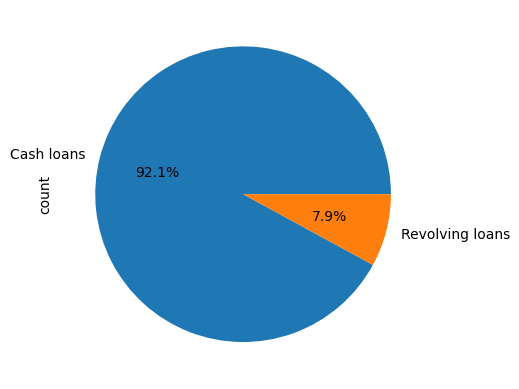

In [499]:
#Plot the pie chart of column NAME_CONTRACT_TYPE values [Type of loan contract (e.g., Cash loans, Revolving loans)]
normalised_home_loan.NAME_CONTRACT_TYPE.value_counts().plot(kind='pie',autopct="%1.1f%%") 

# Observation- #high amount of cash loans

<Axes: ylabel='count'>

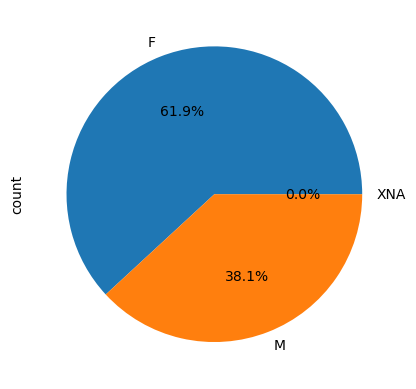

In [502]:
# CODE_GENDER	Gender of the applicant.
normalised_home_loan.CODE_GENDER.value_counts().plot(kind='pie',autopct="%1.1f%%")

# Females are more (~roughly equal amount)

<Axes: ylabel='count'>

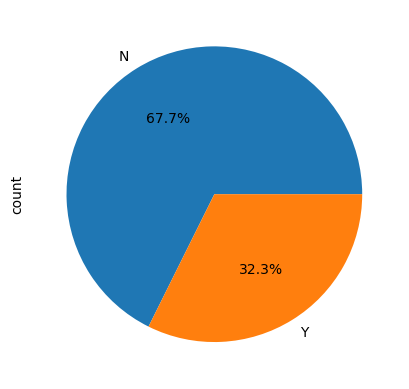

In [505]:
#FLAG_OWN_CAR	Whether the applicant owns a car (Yes/No).
normalised_home_loan.FLAG_OWN_CAR.value_counts().plot(kind='pie',autopct="%1.1f%%")

<Axes: ylabel='count'>

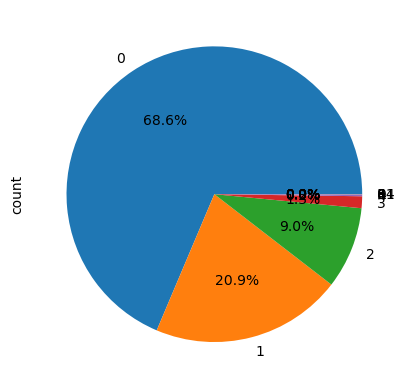

In [507]:
#CNT_CHILDREN	Number of children the applicant has.
normalised_home_loan.CNT_CHILDREN.value_counts().plot(kind='pie',autopct="%1.1f%%")

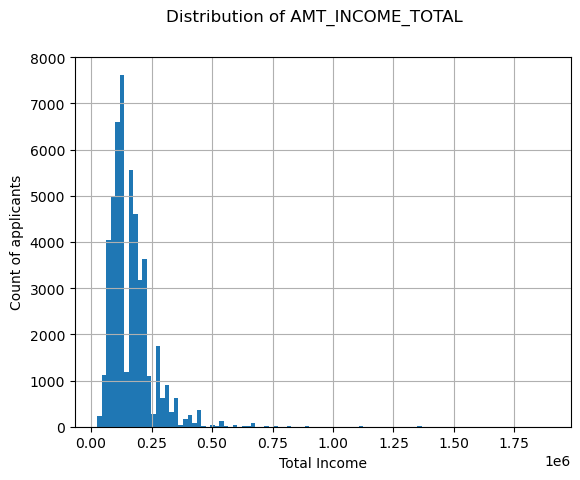

In [508]:
# AMT_INCOME_TOTAL	Total income of the applicant.
normalised_home_loan[normalised_home_loan['AMT_INCOME_TOTAL'] < 2000000]['AMT_INCOME_TOTAL'].hist( bins=100)
plt.suptitle('Distribution of AMT_INCOME_TOTAL')
plt.xlabel('Total Income')
plt.ylabel('Count of applicants')
plt.show()

In [509]:
(normalised_home_loan[normalised_home_loan['AMT_INCOME_TOTAL']>1000000]['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['AMT_INCOME_TOTAL'] > 1000000])*100

TARGET
0    64.864865
1    35.135135
Name: count, dtype: float64

In [511]:
print((normalised_home_loan[normalised_home_loan['CNT_CHILDREN']>2]['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['CNT_CHILDREN'] > 2])*100)
print((normalised_home_loan[normalised_home_loan['CNT_CHILDREN']>5]['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['CNT_CHILDREN'] > 5])*100) 

#Observation- as number of children is increasing lone defaulters are increasing

TARGET
1    57.047872
0    42.952128
Name: count, dtype: float64
TARGET
1    81.818182
0    18.181818
Name: count, dtype: float64


In [515]:
print((normalised_home_loan[normalised_home_loan['FLAG_OWN_CAR']=='N']['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['FLAG_OWN_CAR'] =='N'])*100)
print((normalised_home_loan[normalised_home_loan['FLAG_OWN_CAR']=='Y']['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['FLAG_OWN_CAR'] =='Y'])*100) 

#Observation- people with own cars are slighlty more likely to repay back the loan 

TARGET
1    51.350064
0    48.649936
Name: count, dtype: float64
TARGET
0    52.823962
1    47.176038
Name: count, dtype: float64


In [517]:
print((normalised_home_loan[normalised_home_loan['CODE_GENDER']=='M']['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['CODE_GENDER'] =='M'])*100) 
print((normalised_home_loan[normalised_home_loan['CODE_GENDER']=='F']['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['CODE_GENDER'] =='F'])*100) 

#Observation- men are more likely to default in payment of loans

TARGET
1    56.280372
0    43.719628
Name: count, dtype: float64
TARGET
0    53.867691
1    46.132309
Name: count, dtype: float64


In [519]:
print((normalised_home_loan[normalised_home_loan['NAME_CONTRACT_TYPE']=='Cash loans']['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['NAME_CONTRACT_TYPE']=='Cash loans'])*100) 
print((normalised_home_loan[normalised_home_loan['NAME_CONTRACT_TYPE']=='Revolving loans']['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['NAME_CONTRACT_TYPE']=='Revolving loans'])*100) 

#Observation- cash loans have a higher percent of defaulters

TARGET
1    50.802923
0    49.197077
Name: count, dtype: float64
TARGET
0    59.309995
1    40.690005
Name: count, dtype: float64


### 6. Encode the columns that is required for the model

In [522]:
# To convert categorical features to such integer codes, we can use the OrdinalEncoder. This estimator transforms each categorical 
# feature to one new feature of integers (0 to n_categories - 1):
ordenc=OrdinalEncoder()

In [524]:
# Apply on NAME_CONTRACT_TYPE_CODE column
normalised_home_loan['NAME_CONTRACT_TYPE_CODE']=ordenc.fit_transform(normalised_home_loan[['NAME_CONTRACT_TYPE']]) 
print(normalised_home_loan[['NAME_CONTRACT_TYPE','NAME_CONTRACT_TYPE_CODE']].head(20))
print(normalised_home_loan['NAME_CONTRACT_TYPE_CODE'].value_counts())

       NAME_CONTRACT_TYPE  NAME_CONTRACT_TYPE_CODE
207339         Cash loans                      0.0
8756           Cash loans                      0.0
230344         Cash loans                      0.0
178329         Cash loans                      0.0
55586          Cash loans                      0.0
65695          Cash loans                      0.0
263860         Cash loans                      0.0
10539          Cash loans                      0.0
56254          Cash loans                      0.0
12152          Cash loans                      0.0
13694          Cash loans                      0.0
16621          Cash loans                      0.0
256753         Cash loans                      0.0
112693         Cash loans                      0.0
296306         Cash loans                      0.0
34526          Cash loans                      0.0
31848          Cash loans                      0.0
242007         Cash loans                      0.0
48541          Cash loans      

In [526]:
# Apply on CODE_GENDER_CODE column
normalised_home_loan['CODE_GENDER_CODE']=ordenc.fit_transform(normalised_home_loan[['CODE_GENDER']]) 
print(normalised_home_loan[['CODE_GENDER','CODE_GENDER_CODE']].head(20))
print(normalised_home_loan['CODE_GENDER_CODE'].value_counts())

       CODE_GENDER  CODE_GENDER_CODE
207339           F               0.0
8756             M               1.0
230344           F               0.0
178329           M               1.0
55586            M               1.0
65695            F               0.0
263860           M               1.0
10539            M               1.0
56254            F               0.0
12152            F               0.0
13694            F               0.0
16621            F               0.0
256753           F               0.0
112693           M               1.0
296306           F               0.0
34526            M               1.0
31848            M               1.0
242007           F               0.0
48541            F               0.0
294012           M               1.0
CODE_GENDER_CODE
0.0    30716
1.0    18932
2.0        2
Name: count, dtype: int64


In [528]:
# Apart from M/F, there are two values for Gender Code 'XNA'
normalised_home_loan.loc[normalised_home_loan['CODE_GENDER_CODE']==2]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_CODE,CODE_GENDER_CODE
189640,319880,0,Revolving loans,XNA,Y,Y,0,247500.0,540000.0,27000.0,...,0,0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,2.0
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.0,405000.0,20250.0,...,0,0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0


In [530]:
# Apply on FLAG_OWN_CAR_CODE column
normalised_home_loan['FLAG_OWN_CAR_CODE']=ordenc.fit_transform(normalised_home_loan[['FLAG_OWN_CAR']]) 
print(normalised_home_loan[['FLAG_OWN_CAR','FLAG_OWN_CAR_CODE']].head(20))
print(normalised_home_loan['FLAG_OWN_CAR_CODE'].value_counts())

       FLAG_OWN_CAR  FLAG_OWN_CAR_CODE
207339            N                0.0
8756              Y                1.0
230344            N                0.0
178329            Y                1.0
55586             N                0.0
65695             N                0.0
263860            Y                1.0
10539             Y                1.0
56254             Y                1.0
12152             N                0.0
13694             N                0.0
16621             N                0.0
256753            Y                1.0
112693            N                0.0
296306            N                0.0
34526             N                0.0
31848             N                0.0
242007            N                0.0
48541             N                0.0
294012            N                0.0
FLAG_OWN_CAR_CODE
0.0    33591
1.0    16059
Name: count, dtype: int64


In [532]:
# Apply on CNT_CHILDREN_CODE column
normalised_home_loan['CNT_CHILDREN_CODE']=ordenc.fit_transform(normalised_home_loan[['CNT_CHILDREN']]) 
print(normalised_home_loan[['CNT_CHILDREN_CODE','CNT_CHILDREN']].head(20))
print(normalised_home_loan['CNT_CHILDREN_CODE'].value_counts())

        CNT_CHILDREN_CODE  CNT_CHILDREN
207339                0.0             0
8756                  0.0             0
230344                0.0             0
178329                0.0             0
55586                 0.0             0
65695                 0.0             0
263860                0.0             0
10539                 0.0             0
56254                 0.0             0
12152                 0.0             0
13694                 0.0             0
16621                 2.0             2
256753                0.0             0
112693                0.0             0
296306                2.0             2
34526                 0.0             0
31848                 0.0             0
242007                0.0             0
48541                 0.0             0
294012                0.0             0
CNT_CHILDREN_CODE
0.0     34073
1.0     10381
2.0      4444
3.0       642
4.0        89
5.0        10
6.0         6
8.0         2
9.0         1
10.0        1
7.

In [534]:
#Splitting the dataset into training and testing in the ratio of 80:20 with random state = 45.

# After balancing the data - Number of loan repaid payers=  24825 + 24825 = 49650
num_samples_total = 49650
centers = [(0,0), (5,5)]
num_features_for_samples = 2
cluster_std = 1
normalised_home_loan_features=['SK_ID_CURR','NAME_CONTRACT_TYPE_CODE','CNT_CHILDREN_CODE','FLAG_OWN_CAR_CODE','CODE_GENDER_CODE']
y=normalised_home_loan.TARGET 
X=normalised_home_loan[normalised_home_loan_features]

# Generate data
inputs, targets = make_blobs(n_samples = num_samples_total, centers = centers, n_features = num_features_for_samples, cluster_std = cluster_std)

X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=45)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(33265, 5)
(16385, 5)
(33265,)
(16385,)


In [536]:
clf= RandomForestClassifier()
clf=clf.fit(X_train,y_train)
predictions = clf.predict(X_test)

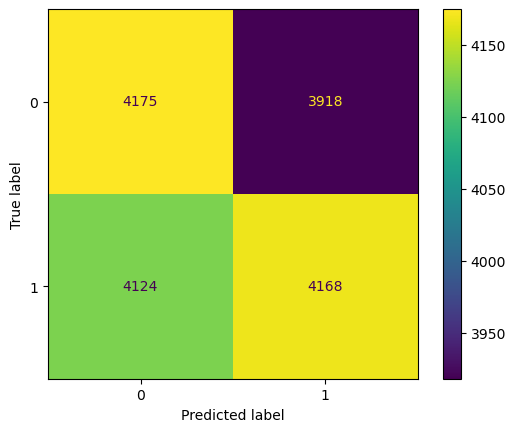

In [537]:
# Generate confusion matrix
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

### 7. Calculate Sensitivity as a metric

In [539]:
# The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. 
# The recall is intuitively the ability of the classifier to find all the positive samples.
print(f"Sensitivity :{0} ",recall_score(y_test, predictions)) 

Sensitivity :0  0.502653159671973


### 8. Calculate the area under the receiver operating characteristics curve

In [541]:
auc_score = roc_auc_score(y_test, predictions)
print(auc_score)

0.509265539430698


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.518


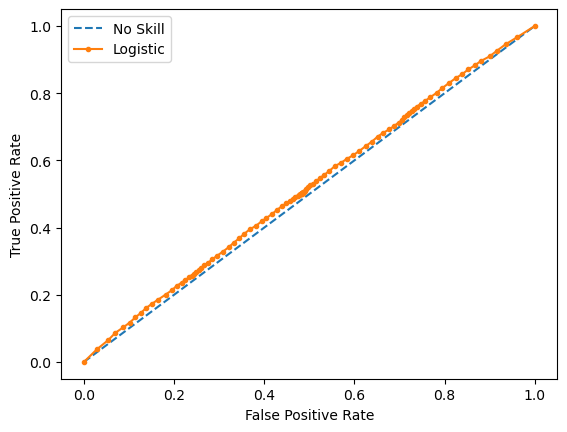

In [542]:
# roc curve and auc

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

AUC: 0.583


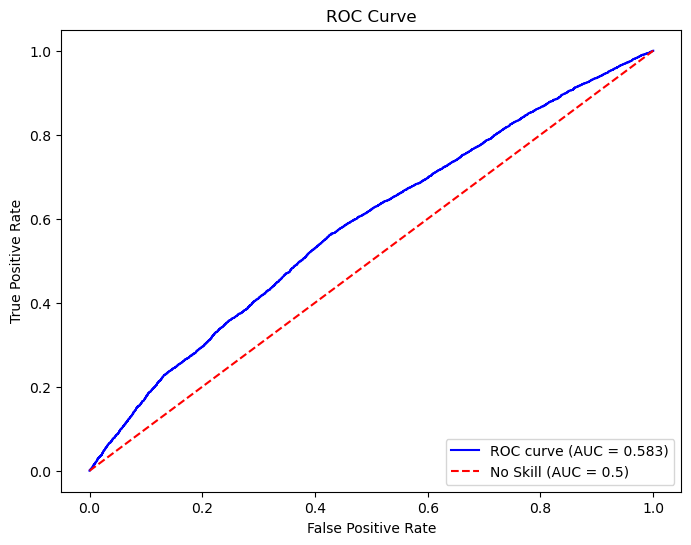

In [563]:
# Train a classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predict probabilities
y_probas = clf.predict_proba(X_test)[:, 1]  # We want the probability of the positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probas)

# Calculate AUC
auc = roc_auc_score(y_test, y_probas)
print(f"AUC: {auc:.3f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='No Skill (AUC = 0.5)')

# Axis labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# Show the legend
plt.legend(loc='lower right')

# Show the plot
plt.show()